<h6 style= 'color: green'> Kmeans <h6>

In [24]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Импортируем модуль numpy для работы с массивами данных
import numpy as np

In [25]:
df = pd.read_csv('german_credit_data_prepared1.csv')
X = df.drop('Unnamed: 0', axis = 1)
# удаляем столбец 'Unnamed: 0', который не несет полезной информации, и сохраняем остальные данные в переменную X
# выводим первые пять строк данных X на экран
X.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Purpose
0,0.857143,1.0,0.666667,0.5,1.0,0.000000,0.050567,0.714286
1,0.053571,0.0,0.666667,0.5,0.0,0.333333,0.313690,0.714286
2,0.535714,1.0,0.333333,0.5,0.0,1.000000,0.101574,0.428571
3,0.464286,1.0,0.666667,0.0,0.0,0.000000,0.419941,0.571429
4,0.607143,1.0,0.666667,0.0,0.0,0.000000,0.254209,0.142857


In [26]:
# Делаем копирование
X_results = X.copy()

In [27]:
# импортируем модуль pickle для загрузки сохраненных объектов
import pickle
# загружаем объект umap, который содержит вложение данных в трехмерное пространство, из файла pkl
umap = pickle.load(open('german_credit_umap.pkl', 'rb'))

In [28]:
# Задаем случайное значение для генератора псевдослучайных чисел
np.random.seed(42)

# Создаем массив цветов случайными значениями от 0 до 1 для каждого объекта в X
colors = np.random.rand(X.shape[0], 4)

# Определяем функцию, которая принимает список меток кластеров
def draw_umap_scatter(labels=[]):
    # Получаем вложение данных из объекта umap
    u = umap.embedding_
    # Создаем объект Figure для рисования графика
    fig = plt.figure()
    # Добавляем подграфик с трехмерной проекцией
    ax = fig.add_subplot(111, projection='3d')
    # Задаем цвета точек в зависимости от меток кластеров или от случайных цветов
    c = labels if len(labels) > 0 else colors 
    # Рисуем трехмерный график рассеяния с заданными цветами и цветовой картой
    scatter = ax.scatter(u[:,0], u[:,1], u[:,2], c=c, cmap='cool')
    # Добавляем цветовую шкалу к графику
    colorbar = fig.colorbar(scatter)
    # Выводим график
    plt.show()

In [29]:
# Импортируем модуль warnings для управления предупреждениями
import warnings
# Устанавливаем фильтр для игнорирования предупреждений типа UserWarning, которые могут возникать при работе с библиотеками
warnings.simplefilter("ignore", UserWarning)

# Импортируем модуль matplotlib.pyplot для визуализации данных
import matplotlib.pyplot as plt
# Импортируем модуль seaborn для красивого оформления графиков
import seaborn as sns
# Устанавливаем стиль, контекст и размер графиков
sns.set(style='white', context='poster', rc={'figure.figsize':(14,10)})

# Импортируем модуль sklearn.cluster для использования алгоритма кластеризации KMeans
from sklearn.cluster import KMeans


# KMeans



Инерция

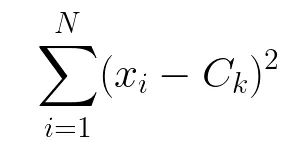

> N is the number of samples within the data set, C is the center of a cluster. So the Inertia simply computes the squared distance of each sample in a cluster to its cluster center and sums them up. This process is done for each cluster and all samples within that data set. The smaller the Inertia value, the more coherent are the different clusters. When as many clusters are added as there are samples in the data set, then the Inertia value would be zero.
> 
> For this, the so called Elbow-Method can be used. But let’s take a look into this method by using an example.

In [30]:
# Создаем пустой список для хранения значений инерции
inertia = []
# Запускаем цикл от 1 до 10, чтобы перебрать разное количество кластеров
for i in range(1,11):
    # Создаем объект KMeans с параметрами n_clusters=i, random_state=10, n_init='auto'
    # Это означает, что мы хотим разбить данные на i кластеров, используя случайное значение 10 для воспроизводимости и автоматический выбор количества инициализаций
    kmeans = KMeans(n_clusters=i, random_state=10, n_init='auto').fit(X)
    # Получаем метки кластеров для каждого объекта в данных
    labels = kmeans.labels_
    # Получаем значение инерции для данного количества кластеров
    inertia_i = kmeans.inertia_
    # Добавляем значение инерции в список
    inertia.append(inertia_i)


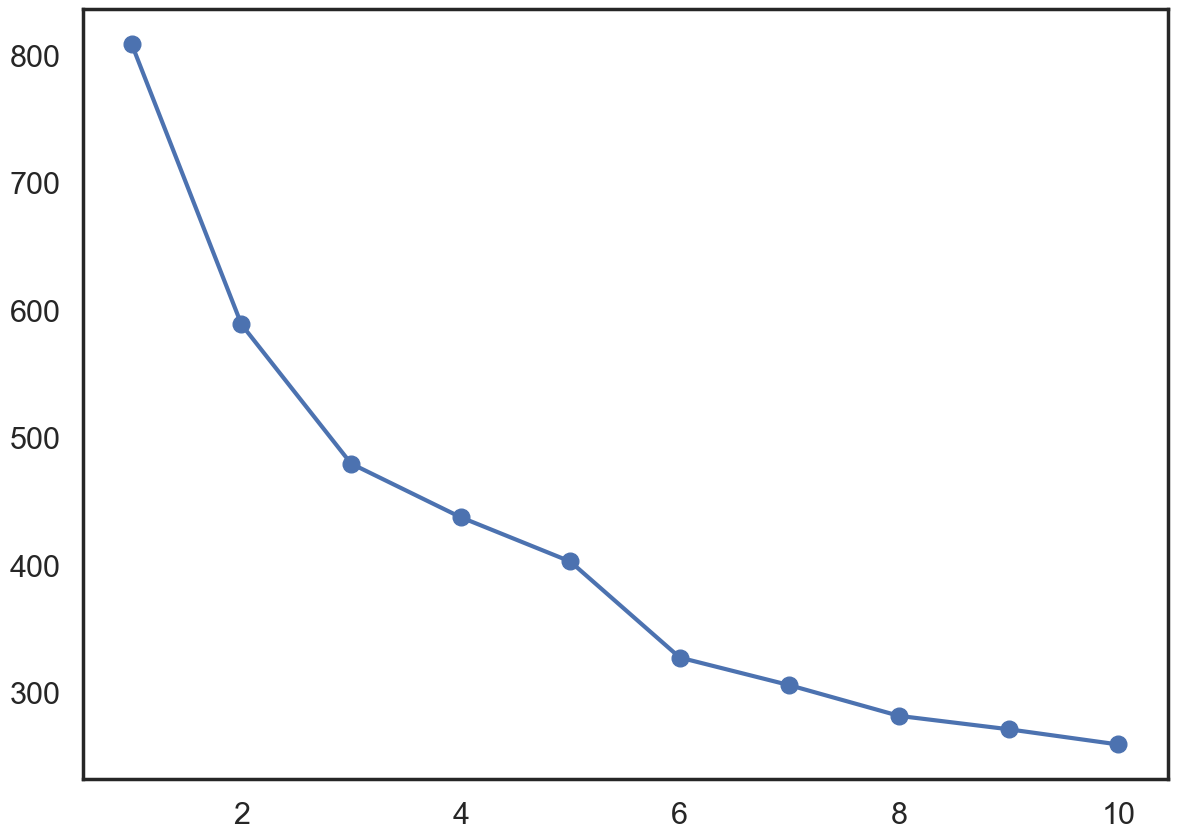

In [31]:
# Импортируем модуль matplotlib.pyplot для визуализации данных
import matplotlib.pyplot as plt

# Рисуем линейный график, показывающий зависимость инерции от количества кластеров
# Используем параметр range(1,11) для задания оси x от 1 до 10
# Используем параметр inertia для задания оси y со значениями инерции
# Используем параметр marker='o' для отображения точек на графике в виде кругов
plt.plot(range(1,11), inertia, marker='o');


Хороший график ("как на картинке"), хотя смею заметить - локтя нет. 
Попробуем посмотреть оптимальный сдвиг.

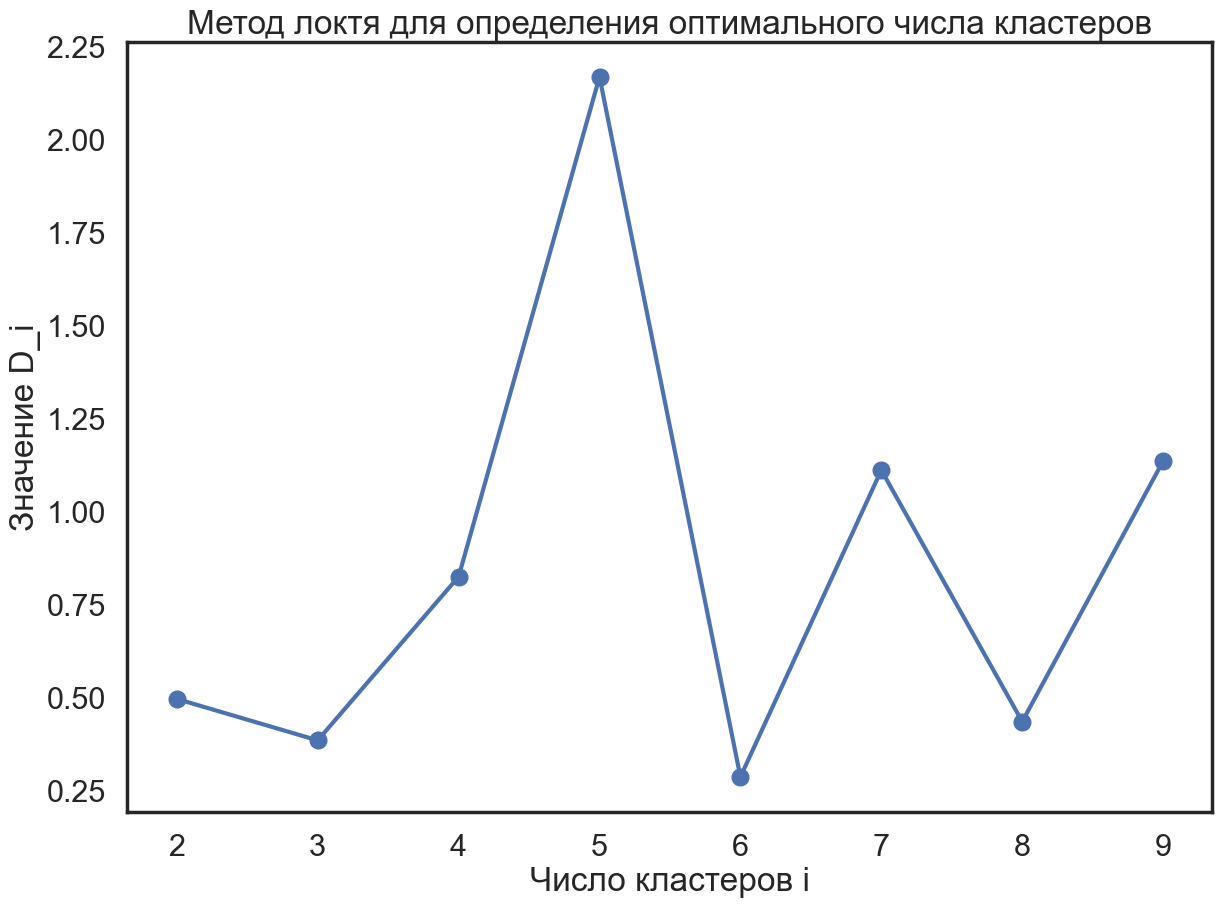

In [34]:
# создаем пустой список для хранения значений D
D = []
# цикл по значениям i от 1 до 8 включительно
for i in range(1,9):
    # вычисляем значение D_i по формуле
    # D_i = (I_i - I_i+1) / (I_i-1 - I_i)
    # где I_i - это значение инерции для i кластеров
    Di = (inertia[i] - inertia[i+1])/(inertia[i-1] - inertia[i])
    # добавляем значение D_i в список D
    D.append(Di)
    
# строим график зависимости D от i с помощью модуля matplotlib.pyplot
# используем plt.plot для построения линии с маркерами 'o'
# используем range(2,10) для оси x, так как D_i определено для i от 2 до 9
plt.plot(range(2,10), D, marker='o');

# добавляем подписи к осям x и y
plt.xlabel("Число кластеров i")
plt.ylabel("Значение D_i")

# добавляем заголовок к графику
plt.title("Метод локтя для определения оптимального числа кластеров")

# показываем график на экране
plt.show()


Этот код предназначен для определения оптимального числа кластеров при использовании метода k-средних. Значение D_i показывает, насколько сильно изменяется инерция при увеличении числа кластеров на 1. Чем меньше D_i, тем лучше качество кластеризации. Обычно выбирают такое i, при котором D_i имеет наибольший скачок. Это называется методом локтя.
Ось x показывает число кластеров i, а ось y показывает значение D_i, которое отражает качество кластеризации. Заголовок графика объясняет, что это метод локтя, который используется для определения оптимального числа кластеров при использовании метода k-средних. 

KMeans посмотрим на графиках с разными кластерами

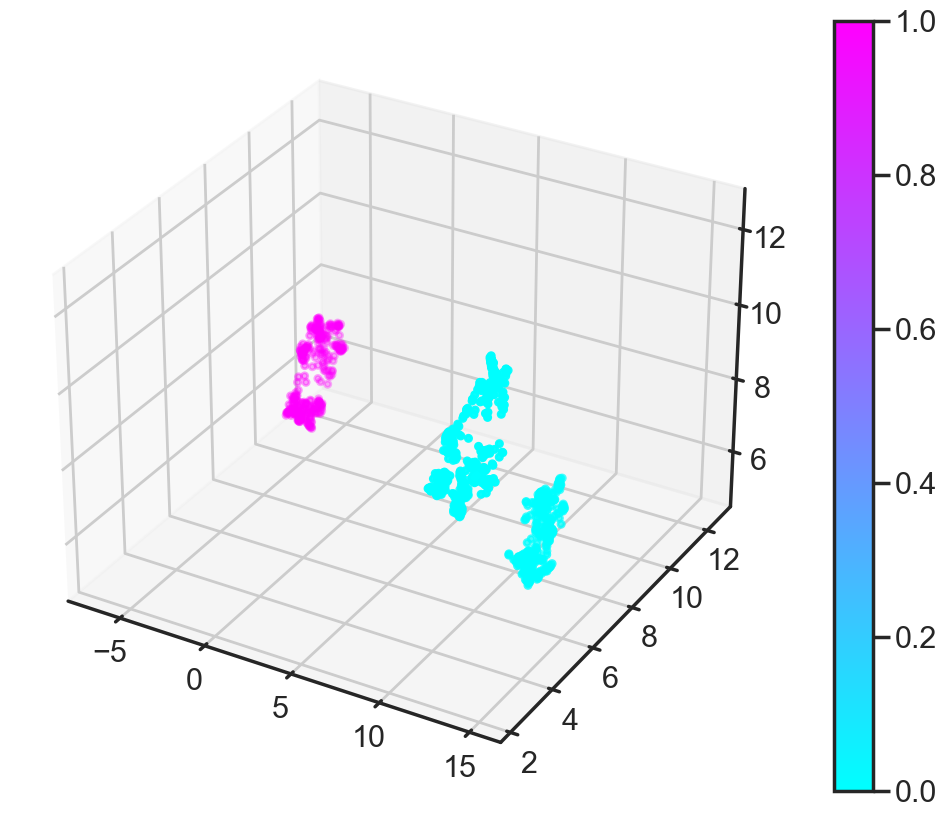

In [35]:
# KMeans при 2 кластерах

# Импортируем модуль sklearn.cluster для использования алгоритма кластеризации KMeans
from sklearn.cluster import KMeans

# Создаем объект KMeans с параметрами n_clusters=2, random_state=10, n_init='auto'
# Это означает, что мы хотим разбить данные на 2 кластера, используя случайное значение 10 для воспроизводимости и автоматический выбор количества инициализаций
kmeans = KMeans(n_clusters=2, random_state=10, n_init='auto').fit(X)
# Получаем метки кластеров для каждого объекта в данных
labels = kmeans.labels_
# Рисуем трехмерный график рассеяния, показывающий распределение объектов по кластерам
draw_umap_scatter(labels)


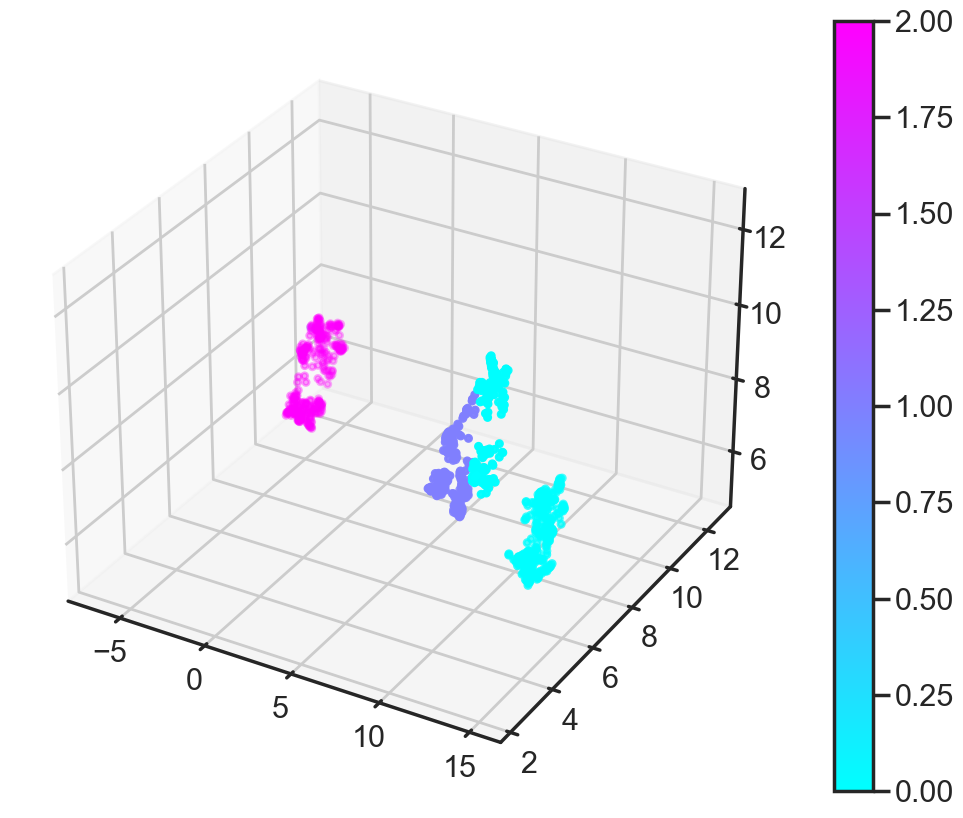

In [36]:
# KMeans при 3 кластерах

# Импортируем модуль sklearn.cluster для использования алгоритма кластеризации KMeans
from sklearn.cluster import KMeans

# Создаем объект KMeans с параметрами n_clusters=3, random_state=10, n_init='auto'
# Это означает, что мы хотим разбить данные на 3 кластера, используя случайное значение 10 для воспроизводимости и автоматический выбор количества инициализаций
kmeans = KMeans(n_clusters=3, random_state=10, n_init='auto').fit(X)
# Получаем метки кластеров для каждого объекта в данных
labels = kmeans.labels_
# Рисуем трехмерный график рассеяния, показывающий распределение объектов по кластерам
draw_umap_scatter(labels)

In [37]:
# Добавляем столбец Labels_K3 в наш объект DataFrame X_results, который содержит метки кластеров, полученные из объекта kmeans
# Это означает, что мы присваиваем каждому объекту в данных метку от 0 до 2, в зависимости от того, к какому кластеру он относится
X_results['Labels_K3'] = kmeans.labels_

In [38]:
# Вызываем метод value_counts на столбце Labels_K3 нашего объекта DataFrame X_results, который содержит метки кластеров, полученные из объекта kmeans
# Используем параметр normalize=True, чтобы получить долю объектов в каждом кластере, а не абсолютное количество
X_results['Labels_K3'].value_counts(normalize=True)

Labels_K3
0    0.493
2    0.309
1    0.198
Name: proportion, dtype: float64

- Это позволяет нам узнать, как распределены объекты по кластерам, когда мы используем метод KMeans с 3 кластерами. 
- Наблюдаем, что 49% объектов относятся к кластеру 0, 19% - к кластеру 1 и 30% - к кластеру 2. Это может помочь нам понять, насколько сбалансированы кластеры и какие кластеры являются наиболее или наименее представленными в данных.

In [39]:
# Вызываем метод groupby на нашем объекте DataFrame X_results, который содержит метки кластеров, полученные из объекта kmeans
# Используем параметр Labels_K3, чтобы сгруппировать данные по меткам кластеров, когда мы используем метод KMeans с 3 кластерами
# Вызываем метод median, чтобы вычислить медиану по каждой группе по каждому столбцу данных
# Вызываем метод T, чтобы транспонировать результат, то есть поменять местами строки и столбцы
# Вызываем метод round, чтобы округлить значения до двух знаков после запятой
X_results.groupby('Labels_K3').median().T.round(2)

Labels_K3,0,1,2
Age,0.27,0.32,0.18
Sex,1.00,1.00,0.00
Job,0.67,0.67,0.67
Housing,0.50,0.50,0.50
Saving accounts,0.00,1.00,0.00
Checking account,0.33,1.00,0.33
Credit amount,0.12,0.13,0.09
Purpose,0.43,0.36,0.57


Вывод:
Мы узнаем, какие характеристики отличают разные кластеры, когда мы используем метод KMeans с 3 кластерами.
- Таблица, показывает медианные значения по каждому столбцу данных для каждого кластера. 
- В кластере 0 средний возраст объектов равен 27 годам, в кластере 1 - 32 годам, а в кластере 2 - 18 годам. Также это означает, что в кластере 0 все объекты имеют пол 1 (женский), в кластере 1 - 1 (женский), а в кластере 2 - тоже 0 (распался). 
- Это может помочь нам понять, какие признаки важны для разделения данных на кластеры и какие группы объектов образуются.

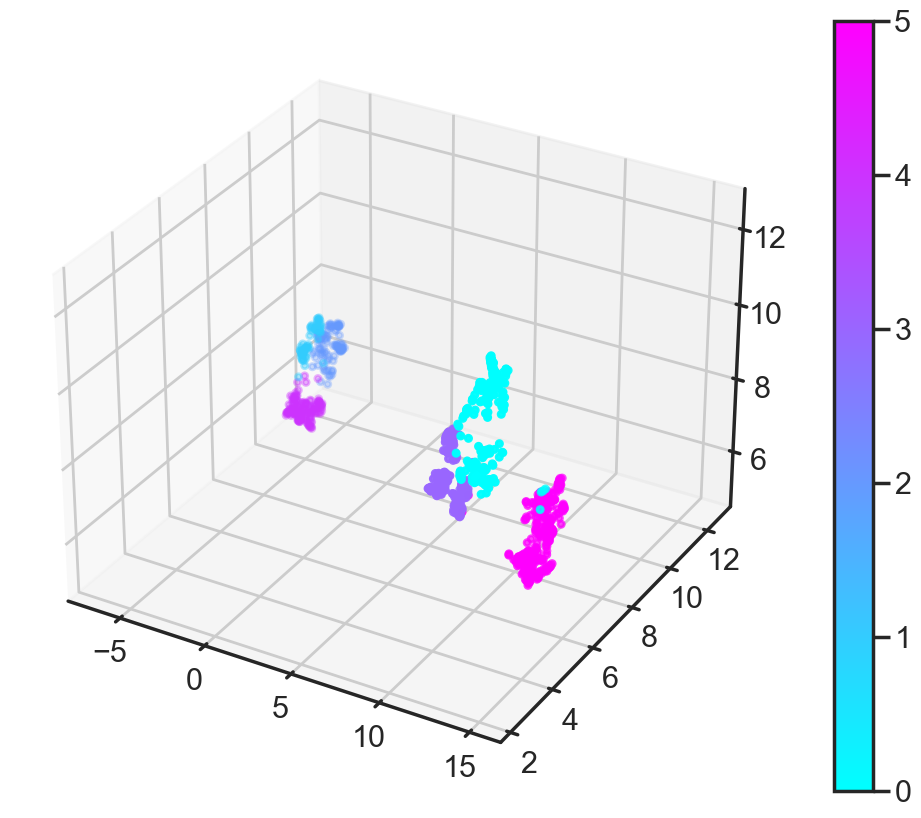

In [40]:
# Импортируем модуль sklearn.cluster для использования алгоритма кластеризации KMeans
from sklearn.cluster import KMeans

# Создаем объект KMeans с параметрами n_clusters=6, random_state=10, n_init='auto'
# Это означает, что мы хотим разбить данные на 6 кластеров, используя случайное значение 10 для воспроизводимости и автоматический выбор количества инициализаций
kmeans = KMeans(n_clusters=6, random_state=10, n_init='auto').fit(X)
# Получаем метки кластеров для каждого объекта в данных
labels = kmeans.labels_
# Рисуем трехмерный график рассеяния, показывающий распределение объектов по кластерам
draw_umap_scatter(labels)

Мы можем понять, как распределены объекты по кластерам, когда мы используем метод KMeans с 6 кластерами. Результатом будет трехмерный график, на котором каждый кластер имеет свой цвет. 
Наблюдаем, что в кластере 0 (зеленый) находятся объекты с низкими значениями по столбцам, в кластере 5 (фиолетовый) - с высокими значениями по столбцам, в кластере 2 (светло синий) - с средними значениями по столбцам, и так далее по другим кластерам. Это может помочь нам понять, какие признаки важны для разделения данных на кластеры и какие группы объектов образуются.

**Вывод: хорошо образуется 5 кластер и выше**

Мнение с сайта Data Exchange, которое говорит, что k-means не подходит для данных с бинарными, дискретными или категориальными признаками, потому что среднее значение не имеет смысла на таких данных. 
Это довольно распространенное заблуждение, которое может привести к неправильному выбору метода кластеризации.

На самом деле k-means может работать с любыми данными, если правильно выбрать метрику расстояния и способ вычисления центроидов. Существуют разные варианты k-means, которые адаптированы для разных типов данных, например:

- k-modes, который использует частоту встречаемости категорий вместо среднего значения для вычисления центроидов и совпадение категорий вместо евклидова расстояния для измерения сходства.
- k-prototypes, который комбинирует k-means и k-modes для работы с данными, содержащими как числовые, так и категориальные признаки.
- k-medoids, который использует существующие объекты в данных в качестве центроидов и произвольную метрику расстояния для измерения сходства.

Таким образом, k-means не ограничивается только числовыми данными, а может быть обобщен и модифицирован для разных ситуаций. Главное - понимать, какие признаки важны для кластеризации и как они влияют на результат. 
- [K-means clustering is not a free lunch] - статья, которая объясняет, почему k-means может работать с разными типами данных, если правильно выбрать метрику и центроиды.


Двинемся дальше к агломеративной кластеризации и DBSCAN и сравним результат. 